In [1]:
import numpy as np
import pandas as pd
import requests
import os
import json

In [2]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# Gathering data

In [3]:
#Download the image-predictions tsv file and write it into the file in the same folder
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open((url.split("/")[-1]), mode='wb') as file:
        file.write(r.content)

In [253]:
tweet_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [78]:
prediction=pd.read_csv('image-predictions.tsv', sep='\t')

In [28]:
non_existing_users=[]
with open('tweet_json.txt', mode='w') as file:
    for tweet_id in df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, Tweet_mode='extended')
            json.dump([tweet.id, tweet.retweet_count, tweet.favorite_count,tweet.text], file)
            file.write('\n')
        except tweepy.TweepError:
            non_existing_users.append(tweet_id)

In [239]:
tweet=pd.read_json('tweet_json.txt',orient='columns',lines=True)
tweet.columns=['tweet_id', 'retweet_count', 'favorite_count','text']

# Assessing Data 

In [30]:
len(non_existing_users)

638

In [240]:
tweet.head()

,tweet_id,retweet_count,favorite_count,text
0,892420643555336193,8322,38055,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,6150,32670,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boop… https://t.co/aQFSeaCu9L"
2,891815181378084864,4068,24584,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.… https://t.co/r0YlrsGCgy
3,891689557279858688,8470,41410,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,9165,39587,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected a… https://t.co/0g0KMIVXZ3"


In [165]:
prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [44]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [91]:
tweet_archive.rating_numerator.value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [45]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [51]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [57]:
tweet_archive[tweet_archive.retweeted_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/1...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/st...",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886...",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 woul...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/st...",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her ...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/st...",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. S...",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None


In [172]:
tweet_archive['name'].value_counts()

a           55
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny       9 
Tucker      9 
the         8 
Winston     8 
Lola        8 
Sadie       8 
Toby        7 
Daisy       7 
Bella       6 
Stanley     6 
Bailey      6 
Oscar       6 
Jax         6 
Koda        6 
an          6 
Bo          6 
Dave        5 
Louis       5 
Buddy       5 
Leo         5 
Milo        5 
Rusty       5 
Bentley     5 
Chester     5 
Scout       5 
           .. 
Kevon       1 
Sweets      1 
Sky         1 
Nimbus      1 
Herschel    1 
Sparky      1 
Hamrick     1 
Angel       1 
Liam        1 
Rudy        1 
Beckham     1 
Astrid      1 
Gordon      1 
Dylan       1 
Amber       1 
Snickers    1 
Jim         1 
Mookie      1 
Venti       1 
Bluebert    1 
Arya        1 
Brat        1 
Gòrdón      1 
Creg        1 
Corey       1 
Mo          1 
Ben         1 
Henry       1 
Bert        1 
Molly       1 
Name: name, Length: 955, dtype: int64

In [77]:
tweet_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [50]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Quality
##### `tweet_archive` table
- Retweet data is included in the table that should be removed
- In doggo, floofer,pupper,puppo and name columns, the none values are not regarded as NaN value
- Timestamp is string not a timedata object
- The rating numerator column has some outliers
- The rating denominator has velues not equals to 10
- Missing records in some columns (less than 2356)
- Dogs with a name of 'a'

##### `prediction` table
- In p1, p2 and p3 columns for breeds of dogs, some start with capital letters but some are not

#### Tidiness
- The source column has too much redundant infomation in `tweet_archive` table
- The favorate and retweet count columns in `tweet` table should be part of the `tweet_archive` table
- Doggo, floofer,pupper,puppo columns can be melt into one column in `tweet_archive` table

# Cleaning data

#### Retweet data

##### Define
Remove the retweet data by query and drop functions.

In [255]:
# drop the retweet data
retweet=tweet_archive[tweet_archive.retweeted_status_id.notnull()]
tweet_archive.drop(index=retweet.index, axis=0, inplace=True)

In [256]:
# Test if the retweet data still there
tweet_archive[tweet_archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### None values in Doggo, floofer,pupper,puppo and name columns

##### Define
Replace the none values with np.nan

In [257]:
# Replace the none string with NaN value
for col in ['doggo', 'floofer','pupper','puppo','name']:
    tweet_archive[col]=tweet_archive[col].replace('None', np.nan)

In [258]:
# Check if they are now shown as null value
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1495 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: float64(4), int64(3), object(10)
memo

#### Timestamp column type

##### Define
Convert the timestamp data to timedata use `to_datetime`

In [259]:
# Convert the data type and check
tweet_archive.timestamp=pd.to_datetime(tweet_archive.timestamp)
tweet_archive.dtypes

tweet_id                      int64         
in_reply_to_status_id         float64       
in_reply_to_user_id           float64       
timestamp                     datetime64[ns]
source                        object        
text                          object        
retweeted_status_id           float64       
retweeted_status_user_id      float64       
retweeted_status_timestamp    object        
expanded_urls                 object        
rating_numerator              int64         
rating_denominator            int64         
name                          object        
doggo                         object        
floofer                       object        
pupper                        object        
puppo                         object        
dtype: object

#### Outliers in rating numerator column

In [260]:
# A closer look at the tweet text found it was due to multiple dogs in the picture or some unknown mistakes
pd.set_option('display.max_colwidth', -1)
tweet_archive[['text', 'rating_numerator', 'rating_denominator']].query("rating_numerator<0 or rating_numerator>14")

,text,rating_numerator,rating_denominator
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
291,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [261]:
# Change data type to float to allow for decimal ratings
tweet_archive['rating_numerator']=tweet_archive['rating_numerator'].astype(float)
tweet_archive['rating_denominator']=tweet_archive['rating_denominator'].astype(float)

In [262]:
# Convert multiple dogs data by get their average value, and manually drop some rows that we do not know how to process
# Some data is wrong because of the decimals, as they are not that many, we can manually assigned the correct values to them based on the text
mask=tweet_archive.query("rating_numerator<0 or rating_numerator>14")

tweet_archive.loc[313,'rating_numerator']=13
tweet_archive.loc[313,'rating_denominator']=10

for index in mask.index:
    convert_rate=tweet_archive.loc[index, 'rating_denominator']/10
    tweet_archive.loc[index, 'rating_denominator']=10
    tweet_archive.loc[index, 'rating_numerator']=tweet_archive.loc[index, 'rating_numerator']/convert_rate

tweet_archive.loc[55,'rating_numerator']=13
tweet_archive.loc[695,'rating_numerator']=9.75
tweet_archive.loc[763,'rating_numerator']=11.27
tweet_archive.loc[1712,'rating_numerator']=11.26

error_row_index=[188,189,290,291,516,979,2074] 
tweet_archive.drop(index=error_row_index, axis=0, inplace=True)

In [263]:
# Now the rating numerators are between 0 and 14, which sounds reasonable
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.168000e+03,7.400000e+01,7.400000e+01,0.0,0.0,2168.000000,2168.000000
mean,7.369083e+17,7.400225e+17,2.123045e+16,NaN,NaN,10.609677,10.008764
std,6.739489e+16,7.392805e+16,1.285751e+17,NaN,NaN,2.204858,0.366347
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,2.000000
25%,6.768214e+17,6.755497e+17,6.500247e+08,NaN,NaN,10.000000,10.000000
50%,7.095381e+17,6.997653e+17,4.196984e+09,NaN,NaN,11.000000,10.000000
75%,7.889658e+17,8.127522e+17,4.196984e+09,NaN,NaN,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,14.000000,20.000000


#### Rating denominator velues not equal to 10

In [264]:
pd.set_option('display.max_colwidth', -1)
tweet_archive[['text', 'rating_numerator', 'rating_denominator']].query('rating_denominator !=10')

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11.0,15.0
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1598,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20.0
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7.0,11.0
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1.0,2.0


#### Define
Mannully correct the values based on the text and drop unknown values

In [265]:
tweet_archive.loc[1068,'rating_numerator']=13
tweet_archive.loc[1068,'rating_denominator']=10
tweet_archive.loc[1165,'rating_numerator']=13
tweet_archive.loc[1165,'rating_denominator']=10
tweet_archive.loc[1662,'rating_numerator']=10
tweet_archive.loc[1662,'rating_denominator']=10
tweet_archive.loc[2335,'rating_numerator']=10
tweet_archive.loc[2335,'rating_denominator']=10
tweet_archive.drop(index=[342,1598], axis=0, inplace=True)

In [266]:
# Now the rating denominator all has a scale of 10
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.166000e+03,7.200000e+01,7.200000e+01,0.0,0.0,2166.000000,2166.0
mean,7.368879e+17,7.394937e+17,2.182018e+16,NaN,NaN,10.624090,10.0
std,6.738610e+16,7.388230e+16,1.303234e+17,NaN,NaN,2.186551,0.0
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,10.0
25%,6.768202e+17,6.754602e+17,1.016001e+09,NaN,NaN,10.000000,10.0
50%,7.095381e+17,6.997653e+17,4.196984e+09,NaN,NaN,11.000000,10.0
75%,7.888728e+17,8.120022e+17,4.196984e+09,NaN,NaN,12.000000,10.0
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,14.000000,10.0


####  Missing records in some columns

In [267]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2166 non-null int64
in_reply_to_status_id         72 non-null float64
in_reply_to_user_id           72 non-null float64
timestamp                     2166 non-null datetime64[ns]
source                        2166 non-null object
text                          2166 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2114 non-null object
rating_numerator              2166 non-null float64
rating_denominator            2166 non-null float64
name                          1493 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: datetime64[ns](1), float6

##### Define
Drop the retweet columns and in_reply_to columns since they are most NaN values, which are not so useful for analysis

In [268]:
tweet_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],
                    axis=1, inplace=True)

In [269]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2166 non-null int64
timestamp             2166 non-null datetime64[ns]
source                2166 non-null object
text                  2166 non-null object
expanded_urls         2114 non-null object
rating_numerator      2166 non-null float64
rating_denominator    2166 non-null float64
name                  1493 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 220.0+ KB


#### Dogs with name of  'a'

##### Define
This is a mistake of extracting names, some of the names can be found in the text and some of them should be replaced with NaN

In [270]:
pd.set_option('display.max_colwidth', -1)
wrong_name=tweet_archive[['text','name']].query('name=="a"')
wrong_name

,text,name
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
801,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
1002,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a
1004,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a
1017,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,a
1049,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a
1193,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,a
1207,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,a
1340,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,a


In [271]:
# Find possible names by extracting 'named xxx.' string, the unmatched will be NaN values
wrong_name['name']=wrong_name['text'].str.extract(r'(named \D+?[\.\s])')
wrong_name['name']=wrong_name['name'].str[6:-1] 
for index in wrong_name.index:
    tweet_archive.loc[index, 'name']=wrong_name.loc[index, 'name']

In [272]:
# No dogs have names of 'a' now
tweet_archive.name.value_counts()

Charlie     11
Lucy        11
Cooper      10
Oliver      10
Tucker      9 
Penny       9 
Winston     8 
Sadie       8 
the         8 
Lola        8 
Toby        7 
Daisy       7 
Oscar       6 
an          6 
Bailey      6 
Koda        6 
Stanley     6 
Jax         6 
Bella       6 
Bo          6 
Dave        5 
Buddy       5 
Louis       5 
Rusty       5 
Bentley     5 
Chester     5 
Milo        5 
Scout       5 
Leo         5 
Jerry       4 
           .. 
Kevon       1 
Sweets      1 
Sky         1 
Sparky      1 
Angel       1 
Skye        1 
Venti       1 
Liam        1 
Rudy        1 
Beckham     1 
Astrid      1 
Gordon      1 
Dylan       1 
Amber       1 
Snickers    1 
Jim         1 
Mookie      1 
Bluebert    1 
Bert        1 
Leroi       1 
Arya        1 
Brat        1 
Gòrdón      1 
Creg        1 
Dewey       1 
Corey       1 
Mo          1 
Ben         1 
Henry       1 
Molly       1 
Name: name, Length: 970, dtype: int64

#### Capital letters in p1, p2 and p3 columns of `prediction` table

##### Define
Use lowercase letters throughout the columns

In [273]:
for col in ['p1','p2','p3']:
    prediction[col]=prediction[col].str.lower()

In [274]:
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Redundant information in source column

##### Define
Extract the last a few words using regular expression

In [275]:
# Extract the key information from source column
tweet_archive['source']=tweet_archive['source'].str.extract(r'(>\D+<)', expand=True)[1:-1]
tweet_archive['source']=tweet_archive['source'].str[1:-1]

In [276]:
# Check the values of source column
tweet_archive.source.value_counts()

Twitter for iPhone     2032
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              10  
Name: source, dtype: int64

#### Join favorate and retweet count columns in `tweet` with `tweet_archive` table

##### Define
Use `merge` function to join these two tables on tweet_id

In [277]:
tweet_archive=pd.merge(tweet_archive, tweet[['tweet_id','retweet_count','favorite_count']], on='tweet_id', how='left')

In [278]:
# Some values in retweet_count and favorate_counts are NaN due to non-existing tweets
tweet_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,NaN,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,8322.0,38055.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,6150.0,32670.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,NaN,NaN,NaN,4068.0,24584.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,NaN,NaN,NaN,8470.0,41410.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,NaN,NaN,NaN,9165.0,39587.0


#### Doggo, floofer,pupper,puppo columns should in one column

##### Define
`melt` function results in multiple columns for the same tweet_id that I cannot find an easy way to handle. For loops are used instead.

In [363]:
# Some rows (12 rows) has more than one dog which caused multiple stages which requires manual correction based on text.
tweet_archive['stage']=np.nan
for index in tweet_archive.index:
    for col in ['doggo', 'floofer','pupper','puppo']:
        if tweet_archive.loc[index, col] ==col:
            tweet_archive.loc[index, 'stage']=tweet_archive.loc[index, col]
tweet_archive.drop(['doggo', 'floofer','pupper','puppo'], axis=1, inplace=True)

In [365]:
#Check column drop and row 9 shows 'doggo' in stage column
pd.reset_option("^display")
tweet_archive.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
0,892420643555336193,2017-08-01 16:23:56,NaN,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8322.0,38055.0,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6150.0,32670.0,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4068.0,24584.0,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,8470.0,41410.0,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,9165.0,39587.0,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,3050.0,19876.0,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,2021.0,11621.0,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,18471.0,64215.0,NaN
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,4189.0,27317.0,NaN
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,7219.0,31343.0,doggo


# Data storage

In [366]:
tweet_archive.to_csv('twitter_archive_master.csv',index=False)

# Data analyzing

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('twitter_archive_master.csv')

In [5]:
df.groupby('rating_numerator')['retweet_count','favorite_count'].mean()

,retweet_count,favorite_count
rating_numerator,,
0.00,1781.500000,13318.000000
1.00,155.000000,1276.000000
2.00,NaN,NaN
3.00,1144.250000,3515.375000
4.00,1027.000000,3484.375000
5.00,2124.285714,7222.571429
6.00,1610.090909,5108.727273
7.00,1661.272727,5380.045455
8.00,1304.029412,3957.411765


Text(0.5,1,'Retweet and favorite counts over the dog rating scores')

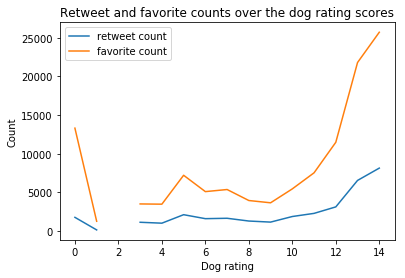

In [6]:
# Round down decimals and plot
plt.plot(df.groupby(df['rating_numerator'].apply(lambda x: round(x,0))) ['retweet_count','favorite_count'].mean())
plt.legend(['retweet count','favorite count'])
plt.xlabel("Dog rating")
plt.ylabel("Count")
plt.title("Retweet and favorite counts over the dog rating scores")

## Insight 1
For dogs with scores higher than 10, an obvious increasing trend of retweet and favorite counts is found. For dogs with rating between 10 and 14, one point rating increase will lead to 1500 more retweet and 5000 more favorite, respectively.

In [23]:
df.groupby(df['rating_numerator'].apply(lambda x: round(x,0))).tweet_id.count()/df.shape[0]

rating_numerator
0.0     0.000923
1.0     0.003232
2.0     0.004155
3.0     0.008772
4.0     0.006925
5.0     0.016620
6.0     0.014774
7.0     0.024469
8.0     0.045245
9.0     0.072022
10.0    0.206371
11.0    0.199908
12.0    0.233149
13.0    0.143583
14.0    0.019852
Name: tweet_id, dtype: float64

## Insight 2
Most ratings (78.1 %) are between 10 and 13, which is encouraging to the tweet users to post their dogs' pictures for rating. If a random user post his dog's picture, he has almost one fourth chance to get a score of 12/10 !

In [53]:
df['timestamp']=pd.to_datetime(df['timestamp'])

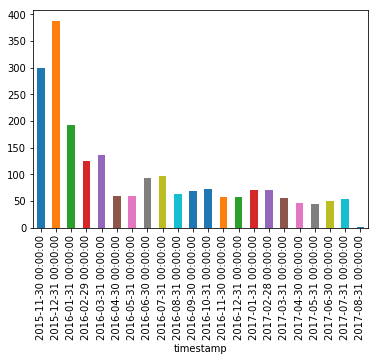

In [55]:
df.groupby(pd.Grouper(key='timestamp',freq="M"))['tweet_id'].count().plot(kind='bar')

## Insight 3
The active period of this @dog_rates account is between Nov.2015 - Mar.2016, which reaches its maximal rating count of around 400 at Dec 2015. In 2017, average rating count is around 60 per month.

# Data visualization

In [83]:
df_pred=df.merge(prediction[['tweet_id','p1','p1_conf']], how='left', on='tweet_id')

In [85]:
df_pred['p1']=df_pred['p1'].str.lower()

In [102]:
df_pred.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage,p1,p1_conf
0,892420643555336193,2017-08-01 16:23:56,NaN,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8322.0,38055.0,NaN,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6150.0,32670.0,NaN,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4068.0,24584.0,NaN,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,8470.0,41410.0,NaN,paper_towel,0.170278
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,9165.0,39587.0,NaN,basset,0.555712


In [90]:
popular_dog=df_pred['p1'].value_counts().head(10).index

In [96]:
pupular_dog_count=df_pred['p1'].value_counts().head(10).values

In [104]:
ratings=[]
for dog in popular_dog:
    score=df_pred[df_pred['p1']==dog].rating_numerator.mean()
    ratings.append(score)

(9.8, 12.2)

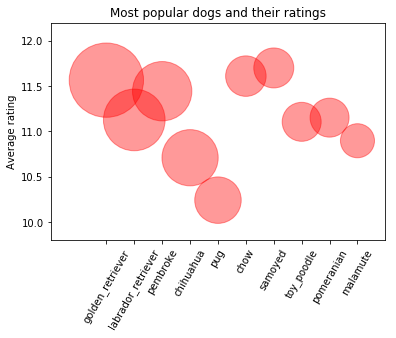

In [124]:
plt.scatter(popular_dog, ratings, s = pupular_dog_count*40, alpha=0.4, edgecolors = "red", c = "red", zorder = 2)
plt.xticks([0,1,2,3,4,5,6,7,8,9], popular_dog, rotation=60)
plt.title('Most popular dogs and their ratings')
plt.ylabel('Average rating')
plt.xlim((-2, 10))
plt.ylim((9.8,12.2))

#### Based on the prediction, the top 10 most popular dog breeds and their average rating are selected.  The size of the circles represents the count of these dogs.